# Machine Learning with scikit-learn

Machine learning cheat sheets:
- [Cheat sheets](https://github.com/afshinea/stanford-cs-229-machine-learning)
- [Stanford CS-229 Supervised Learning](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning)
- [Stanford CS-229 Unsupervised Learning](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-unsupervised-learning)
- [Standford CS-229 Deep Learning](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning)
- [Standford CS-229 Tips & Tricks](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks)

Quick refresher on how to interpret a regression model - read [this example](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/) Its in context of dummy vs effect coding for dealing with categorical predictors.
More good ref links:
[residuals and regression](https://www.analyticsvidhya.com/blog/2013/12/residual-plots-regression-model/), [StatsModels qqplot](http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html), [seaborn residplot](http://seaborn.pydata.org/generated/seaborn.residplot.html), [lin reg worked exp on Boston housing](http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/)

In [1]:
# some basic imports - more are scattered throughout the workbook as specific topics are discussed
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from IPython.display import display

### Example: iris

In [2]:
# load the iris data set that comes with sklearn
iris = datasets.load_iris()                 
display(type(iris))
# don't use bunches its a way scikit packages some numpy arrays - you only need numpy arrays to feed your model

print(iris.keys())
print(type(iris.data), type(iris.target))
print(iris.data.shape)
print(iris.target_names)

# name things logically
Xi = iris.data
yi = iris.target
df_iris = pd.DataFrame(Xi, columns=iris.feature_names)
display(df_iris.head())

sklearn.utils.Bunch

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


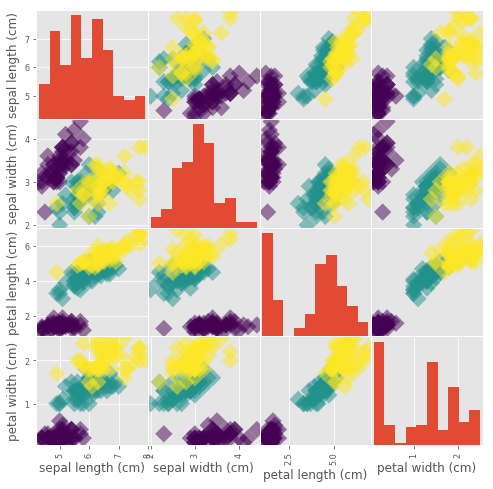

In [3]:
_ = pd.plotting.scatter_matrix(df_iris, c = yi, figsize = [8, 8], s=150, marker='D')
plt.show()

### Example: Election
You will see that there are certain data points labeled with a `?`. These denote missing values. Different datasets encode missing values in different ways. Sometimes it may be a `9999`, other times a `0` - real-world data can be very messy! If you're lucky, the missing values will already be encoded as `NaN`. We use `NaN` because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as `.dropna()` and `.fillna()`, as well as scikit-learn's Imputation transformer `Imputer()`.

In [4]:
df_elec = pd.read_csv('data/scl_ds1.csv',delimiter=",")
df_elec.shape

(435, 17)

In [5]:
display(df_elec.info())
display(df_elec.describe())
display(df_elec.party.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


None

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


democrat      267
republican    168
Name: party, dtype: int64

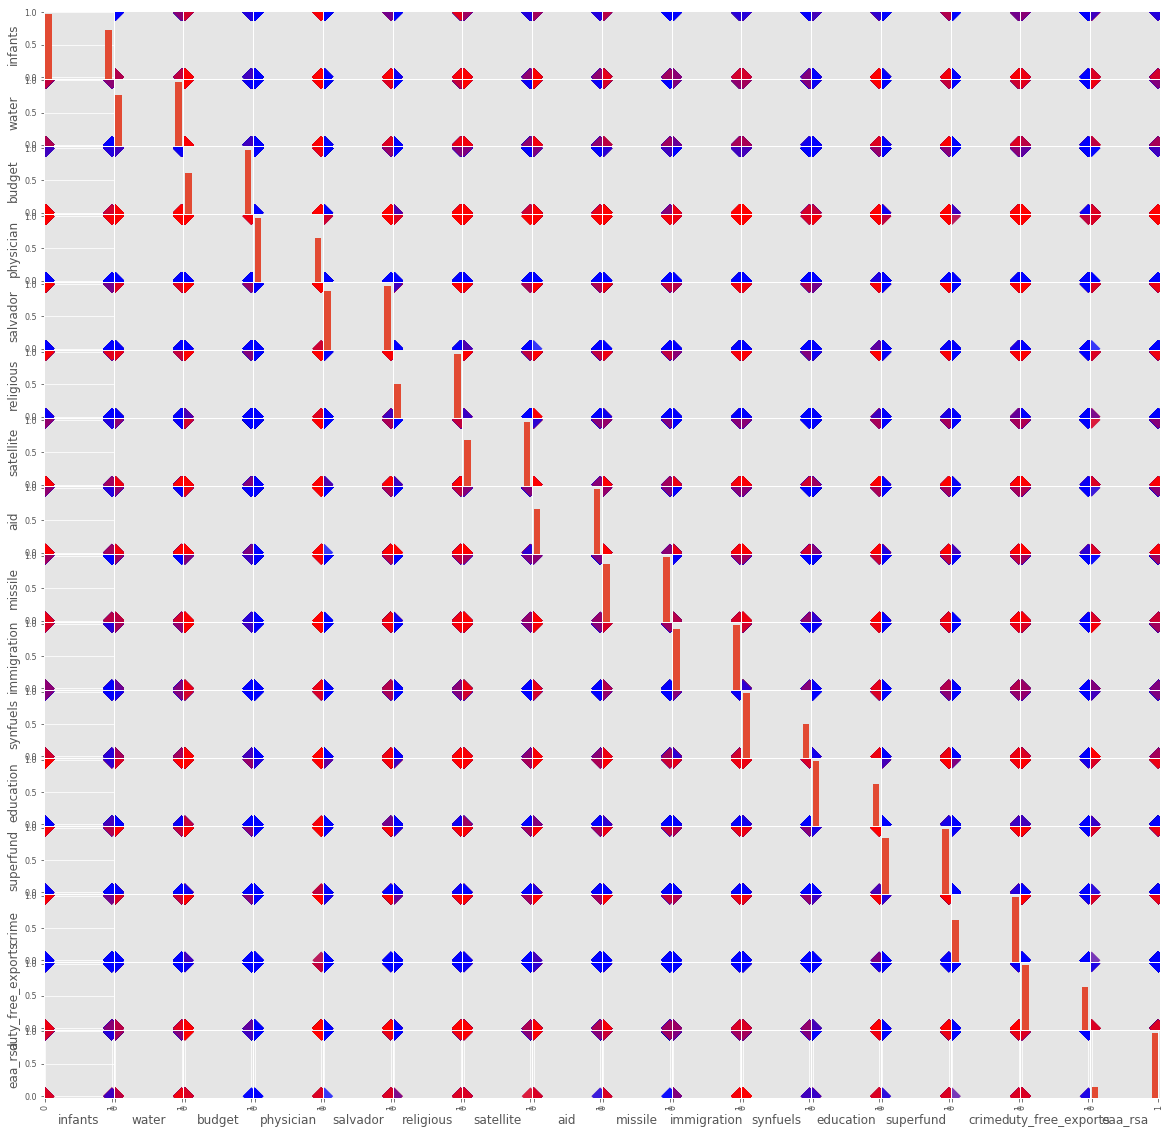

In [6]:
_ = pd.plotting.scatter_matrix(df_elec, 
                               c=df_elec.party.apply(lambda x:'red' if x=='republican' else 'blue'),
                               figsize = [20, 20], s=150, marker='D')
plt.show()
# way too hard to see anything because the data is all 1,0 rather than continuous.

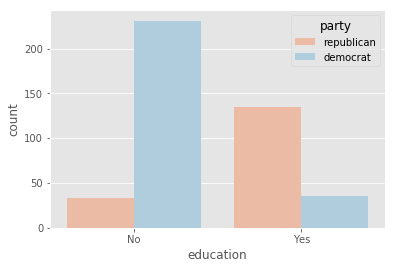

In [7]:
plt.figure()
sns.countplot(x='education', hue='party', data=df_elec, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

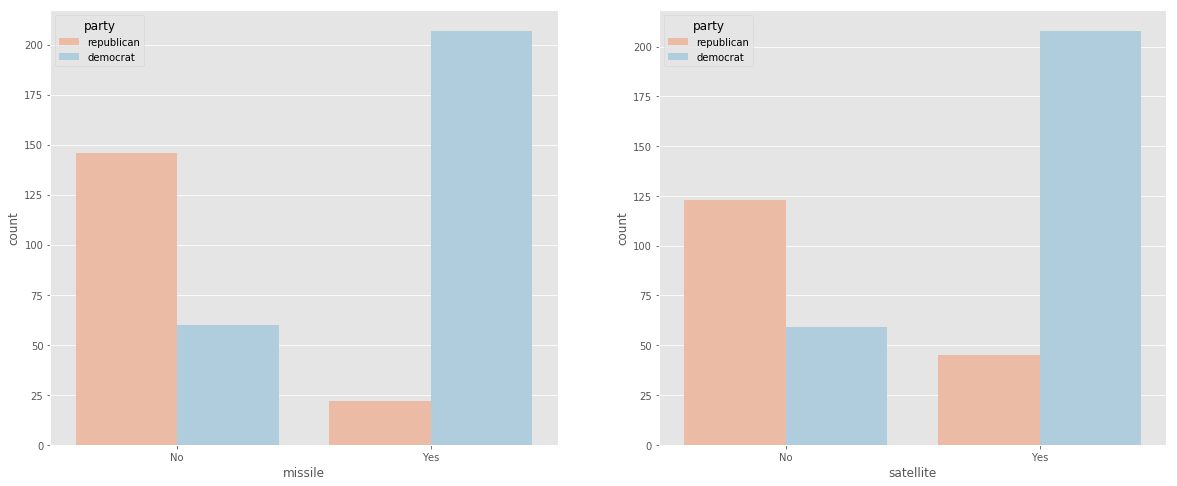

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [20, 8])
sns.countplot(x='missile', hue='party', data=df_elec, palette='RdBu', ax=ax1)
ax1.set_xticklabels(['No', 'Yes'])
sns.countplot(x='satellite', hue='party', data=df_elec, palette='RdBu', ax=ax2)
ax2.set_xticklabels(['No', 'Yes'])
plt.show()

# K-nearest neighbor (KNN)
K is number of neighbors you look at - do a majority vote to assign new points category

All methods are python classes, `.fit()` method trains the data `.predict()` used to predict new data points result.

- Larger k = smoother decision boundary = less complex model 
- Smaller k = more complex model = can lead to overfitting

KNN can have a threashold - not super clear exactly what this does but is relevant when class sizes differ.

[Paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4978658/) laying the out the common distance measurements and their definitions: 

### Example: Iris

In [9]:
# import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# instanciate it and set the number of neighbors to use, assign to variable
knn = KNeighborsClassifier(n_neighbors=6)

# pass two variables the data as a numpy array and then the target as a numpy array
knn.fit(iris['data'], iris['target'])
print(knn.fit(iris['data'], iris['target']))

print(iris['data'].shape)
print(iris['target'].shape)

Xi_new = np.array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(Xi_new)
print(Xi_new.shape)
print('Prediction {}'.format(prediction))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')
(150, 4)
(150,)
(3, 4)
Prediction [0 0 0]


Scikit-learn requires the following for training:
-   data as a numpy array or panda's dataframe
-   data are continuous (eg price of house)
-   no missing data

Features need to be in a array with columns are features and the observations in rows

### Example: Election

In [10]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
ye = df_elec['party'].values
Xe = df_elec.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(Xe, ye)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [11]:
Xe_new = np.array([[ 0.66332283,  0.47434057,  0.31169953,  0.38289013,  0.91641599,
         0.24090253,  0.07671219,  0.18386077,  0.01654042,  0.71464836,
         0.83538318,  0.35465178,  0.29400057,  0.2778129 ,  0.05845734,
         0.46091241],])
Xe_new.shape

(1, 16)

In [12]:
# Fit the classifier to the data
knn.fit(Xe,ye)

# Predict the labels for the training data X
y_pred = knn.predict(Xe)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(Xe_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


# Measuring performance
accuracy is commonly used:
    Accuracy = Fraction of correct predictions
Split train and test data so that you assess accuracy on data it has not seen.

 - test_size = 0-1 %of data to put into test set, defaults to 25%
 - random_state = pass' in a seed so that results can be reproduced
 - shuffle = Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
 - stratify = If not None, data is split in a stratified fashion (returns training and test subsets that have the same proportions of class labels as the input dataset).

### Example: Iris

In [13]:
from sklearn.model_selection import train_test_split

Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.3, random_state=21, stratify=yi)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(Xi_train, yi_train)
yi_pred = knn.predict(Xi_test)
print("Test set predictions:\n {}".format(yi_pred))

knn.score(Xi_test, yi_test)


Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


0.9555555555555556

### Example: MNIST digits

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. 

Scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects (`digits.images` or `digits['images']`)

Scikit-learn provides:
 - 'images' 2D array of the images corresponding to each sample
 - 'data' the feature array - that is, the images as a flattened array of 64 pixels.
 - 'target' the key for y

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

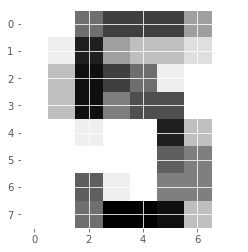

In [14]:
# Load the digits dataset: digits
digits = datasets.load_digits() 

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [15]:
# Create feature and target arrays
Xd = digits.data
yd = digits.target

# Split into training and test set
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.2, 
                                                        random_state=42, stratify=yd)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(Xd_train,yd_train)

# Print the accuracy
print(knn.score(Xd_test, yd_test))

0.9833333333333333


# Over fitting and Under fitting

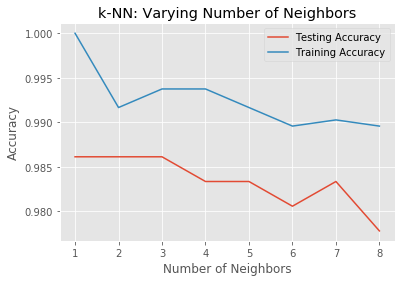

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(Xd_train,yd_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(Xd_train, yd_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(Xd_test, yd_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Graph not exactly what was in the worked example - random state and limited data effecting this a little.
<img src="data/k-NN_VaryK.png" alt="Alt text that describes the graphic" title="From example ref"  width="344" height="256"/>

# Regression
continuously varying series

### Example: Boston Housing

In [17]:
boston_tr = pd.read_csv('data/BH_train.csv')
boston_te = pd.read_csv('data/BH_test.csv')
boston = pd.concat([boston_tr, boston_te], sort=True)
boston.sort_values('ID', inplace=True)
boston.head()
#boston = datasets.load_boston()
#boston.data

# note test does not include the medv or target variable - slides included both sets

,ID,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
0,1,65.2,396.90,0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1,6.575,296,18.0
1,2,78.9,396.90,0,0.02731,4.9671,7.07,9.14,21.6,0.469,17.8,2,6.421,242,0.0
0,3,61.1,392.83,0,0.02729,4.9671,7.07,4.03,NaN,0.469,17.8,2,7.185,242,0.0
2,4,45.8,394.63,0,0.03237,6.0622,2.18,2.94,33.4,0.458,18.7,3,6.998,222,0.0
3,5,54.2,396.90,0,0.06905,6.0622,2.18,5.33,36.2,0.458,18.7,3,7.147,222,0.0


In [18]:
# creating feature and target Numpy arrays
Xb = boston_tr.drop('medv', axis=1).values
yb = boston_tr['medv'].values

In [19]:
# predicting house values from a single feature - have to be careful with which feature
Xb_rooms = Xb[:,6]
print(type(Xb_rooms), type(yb))

# reshaping as we need a 2D array for sklearn
yb = yb.reshape(-1, 1)
Xb_rooms = Xb_rooms.reshape(-1, 1)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


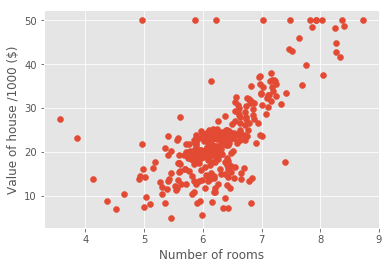

In [20]:
# plotting house value vs.number of rooms
plt.scatter(Xb_rooms, yb)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


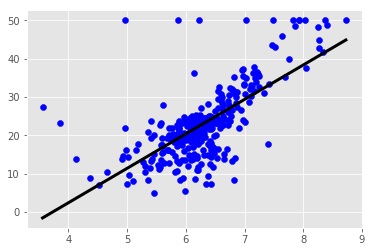

In [21]:
# fitting a regression model
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(Xb_rooms, yb)
prediction_space = np.linspace(min(Xb_rooms), max(Xb_rooms)).reshape(-1,1)
plt.scatter(Xb_rooms, yb, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

### Example: Gap minder

In [213]:
# I think there data has more accuracy (more dec places than mine) at least for last exercise
df_gp = pd.read_csv('data/scl_ds2_GM.csv')
print(df_gp.shape)
df_gp.head()

(139, 10)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,region
0,34800000.0,2.73,0.1,3.33,24.6,12300.0,130.0,75.3,29.5,Middle East & North Africa
1,19800000.0,6.43,2.0,1.47,22.3,7100.0,130.0,58.3,192.0,Sub-Saharan Africa
2,40400000.0,2.24,0.5,4.79,27.5,14600.0,119.0,75.5,15.4,America
3,2980000.0,1.40,0.1,1.80,25.4,7380.0,133.0,72.5,20.0,Europe & Central Asia
4,21400000.0,1.96,0.1,18.00,27.6,41300.0,117.0,81.5,5.2,East Asia & Pacific


In [67]:
# Create arrays for features and target variable
y_gp = df_gp['life'].values
X_fertility = df_gp['fertility'].values
X_gp = df_gp.drop(['life','region'], axis=1).values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y_gp.shape))
print("Dimensions of X fertility before reshaping: {}".format(X_fertility.shape))

# Reshape X and y
y_gp = y_gp.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_gp.shape))
print("Dimensions of X after reshaping: {}".format(X_fertility.shape))
print("Dimensions of X : {}".format(X_gp.shape))
print("Dimensions of X all : {}".format(Xall_gp.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X fertility before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)
Dimensions of X : (139, 8)
Dimensions of X all : (139, 9)


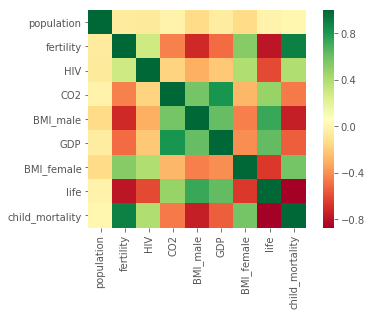

In [24]:
# explore the data with a heat map
sns.heatmap(df_gp.corr(), square=True, cmap='RdYlGn')
plt.show()

In [25]:
df_gp.info()
display(df_gp.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702061,28.456980,126076.000000,135.492000,82.600000,192.000000


In [26]:
df_gp.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702061,28.456980,126076.000000,135.492000,82.600000,192.000000


## Regression without regularization
Ordinary Least squares (OLS): Minimize sum of squares of residuals
$$ cost function = \sum^n_{i=1}(y_i-\hat{y})^2$$

OLS really only works for one predicting variable and it uses vertical | distance | as the thing to minimize.
<img src="data/OLS_LF_LinRegression.png" alt="Alt text that describes the graphic" title="From example ref"  width="344" height="256"/>

$$y = a_1x_1 + a_2x_2+ a_3x_3 + a_nx_n + b$$

Regression usually is scored using the $R^2$ measure or Goodness-of-fit for a Linear Model (aka coefficient of determination, or the coefficient of multiple determination for multiple regression)

The definition of R-squared is the percentage of the response variable variation that is explained by a linear model. Or:

$$R^2 = \frac{ExplainedVariation}{TotalVariation}$$

### Example: Boston Housing (multiple features)

In [27]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 0.3,
                                                        random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(Xb_train, yb_train)
y_pred = reg_all.predict(Xb_test)
reg_all.score(Xb_test, yb_test)

# not quite matching slides as they are using the full combined set of data.

0.7247077336757706

### Example: Gap Minder - one predictor variable

R^2 (one predictor variable): 0.6192442167740035


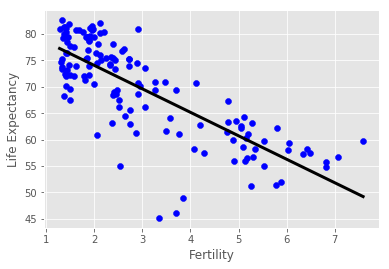

In [28]:
# from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = linear_model.LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y_gp)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R^2 (one predictor variable): {}".format(reg.score(X_fertility, y_gp)))

# Plot data
plt.scatter(df_gp['fertility'], df_gp['life'], color='blue')
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


### Example: Gap Minder - all predictor variables

In [29]:
# Import necessary modules
#from sklearn.linear_model import LinearRegression  # already imported
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split  # already imported

# Create training and test sets
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X_gp, y_gp, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = linear_model.LinearRegression()

# Fit the regressor to the training data
reg_all.fit(Xg_train, yg_train)

# Predict on the test data: y_pred
yg_pred = reg_all.predict(Xg_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(Xg_test, yg_test)))
rmse = np.sqrt(mean_squared_error(yg_test,yg_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731657796
Root Mean Squared Error: 3.2476010798086836


## Cross validation
splitting data multiply ways and then averaging to get a better fit.
 - 5 fold - 5-fold CV (split the data into 5 splits or Cross Validation sets)
 - k folds - k-fold CV
 
More folds are more computationally expensive

### Example: Boston Housing (multiple features)

In [30]:
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, Xb, yb, cv=5)
print(cv_results)
#[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
np.mean(cv_results)
#0.35327592439587058

[ 0.38711489  0.67215051  0.56554893 -0.06340099 -2.26992206]


-0.14170174415898074

### Example: Gap Minder - all predictor variables

In [31]:
# Import the necessary modules
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = linear_model.LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_gp, y_gp, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722856088


In [32]:
# exploring speed of CV
%timeit cross_val_score(reg, X_gp, y_gp, cv=3)
cv_scores_3 = cross_val_score(reg, X_gp, y_gp, cv=3)
print(np.mean(cv_scores_3))

%timeit cross_val_score(reg, X_gp, y_gp, cv=10)
cv_scores_10 = cross_val_score(reg, X_gp, y_gp, cv=10)
print(np.mean(cv_scores_10))

3.94 ms ± 82.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8718712782979531
12.7 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8436128620210248


# Regularization
Preventing over-fitting by penalizing the loss function for any coefficient with a large magnitude.

$\alpha$ or $\lambda$ are the standard names for the controlling hyper-parameter for ridge regression

K is a hyper-parameter in k-nearest neighbor calculations

## Ridge regression (aka L2)
OLS Loss Function = $\sum^n_{i=1}(y_i-\hat{y})^2$
$$Lossfunction = \sum^n_{i=1}(y_i-\hat{y})^2 + \alpha * \sum^n_{i=1}a^2_i$$
$a_i$ = each coefficient

### Example: Boston Housing (multiple features)

In [33]:
from sklearn.linear_model import Ridge
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(Xb_train, yb_train)
ridge_pred = ridge.predict(Xb_test)
ridge.score(Xb_test, yb_test)

0.7436946354500766

## Lasso regression (aka L1)
OLS Loss Function = $\sum^n_{i=1}(y_i-\hat{y})^2$
$$Lossfunction = \sum^n_{i=1}(y_i-\hat{y})^2 + \alpha * \sum^n_{i=1}\mid a_i\mid$$
$a_i$ = each coefficient

Using normalize scales the features before fitting the model

### Example: Boston Housing (multiple features)

In [34]:
from sklearn.linear_model import Lasso
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 0.3,
                                                        random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(Xb_train, yb_train)
lasso_pred = lasso.predict(Xb_test)
lasso.score(Xb_test, yb_test)

0.6537775481435799

Lasso regression can be used for feature selection
 - Can be used to select important features of a dataset
 - Shrinks the coefficients of less important features to exactly 0

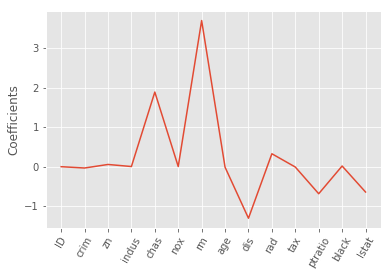

In [35]:
from sklearn.linear_model import Lasso
names = boston_tr.drop('medv', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(Xb, yb).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

### Example: Gap Minder - Lasso (L1)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


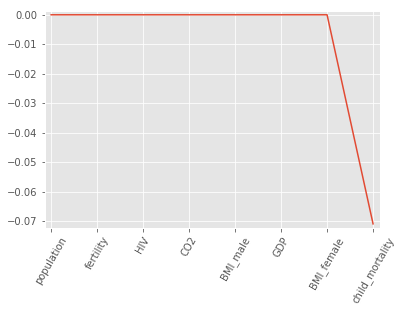

In [36]:
# Import Lasso
#from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_gp,y_gp)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

df_gp_columns = df_gp.drop('life', axis=1).columns

# Plot the coefficients
plt.plot(range(len(df_gp_columns)), lasso_coef)
plt.xticks(range(len(df_gp_columns)), df_gp_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

### Example: Gap Minder - Ridge (L2) with various $\alpha$

In [37]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

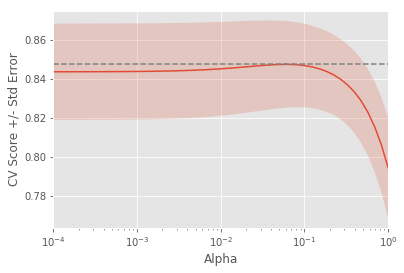

In [38]:
# Import necessary modules
#from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_gp, y_gp, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

# Different measures
if you have significant class imbalance (ie very few $\approx1\%$ spam emails) then accuracy isn't a good metric to judge your model by as a stupid always email would score $99\%$.

### Confusion matrix:
| | Predicted: Spam Email | Predicted: Real Email |
|---|---|---|
|Actual: Spam Email | True Positive | False Negative |
|Actual: Real Email | False Positive | True Negative |

trying to detect spam so that is positive - doesn't really matter

$Accuracy: \frac{tp+tn}{tp+tn+fp+fn}$

$Precision: \frac{tp}{tp+fp}$ positive predictive value (ppv) 

$Recall: \frac{tp}{tp+fn}$ sensitivity, hit rate, true positive rate 

($\frac{fp}{tn+fp}$ false positive rate)

$F1 score: 2 * \frac{precision * recall}{precision + recall}$ Harmonic mean 

 - High precision: Not many real emails predicted as spam 
 - High recall: Predicted most spam emails correctly
 
[Precision & Recall wiki page](https://en.wikipedia.org/wiki/Precision_and_recall)
<img src="data/PrecisionAndRecall.png" alt="Alt text that describes the graphic" title="From example ref"  width="200" height="100"/>

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108   7]
 [  4  55]]
             precision    recall  f1-score   support

   democrat       0.96      0.94      0.95       115
 republican       0.89      0.93      0.91        59

avg / total       0.94      0.94      0.94       174



The support gives the number of samples of the true response that lie in that class

### Example:  PIMA Indians & diabetes (UCI Machine Learning Repository)

In [115]:
df_pima = pd.read_csv('data/scl_ds3_PIMA.csv')
display(df_pima.head())
X_pima = df_pima.drop('diabetes', axis=1).values
y_pima = df_pima['diabetes'].values

print(X_pima.shape, y_pima.shape)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


(768, 8) (768,)


In [41]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(X_pima, y_pima, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_pima_train, y_pima_train)

# Predict the labels of the test data: y_pred
y_pima_pred = knn.predict(X_pima_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_pima_test, y_pima_pred))
print(classification_report(y_pima_test, y_pima_pred))

[[176  30]
 [ 52  50]]
             precision    recall  f1-score   support

        0.0       0.77      0.85      0.81       206
        1.0       0.62      0.49      0.55       102

avg / total       0.72      0.73      0.72       308



# Logistic Regression (used for classification) - Binary at first

Logistic regression outputs probabilities, between 0 and 1. 

For binary classification:
- If p > threshold then data is labeled 1 
- if p < threshold then data is labeled 0

By default threshold = 0.5

Logistic Regression hyper-parameter is called C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

### Example:  Election data

In [48]:
# lables need to be 1's and 0's for sklearn's logistic regression
ye_b = [0 if x == 'republican' else 1 for x in ye]

In [49]:
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye_b, test_size=0.4, random_state=42)
logreg.fit(Xe_train, ye_train)
ye_pred = logreg.predict(Xe_test)

## The Receiver operating characteristic (ROC) curve
[wiki page on ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Plot the True Positive Rate vs False Positive Rate for the full range of thresholds.

- When p=threshold is 1, then we always predict 0 and the True Positive Rate and False Positive Rate = 0 (TP will be small but so also will FPs)
- When p=threshold is 0, then we always predict 1 and the True Positive Rate and False Positive Rate = 1 (TP will be large but so also will FPs)

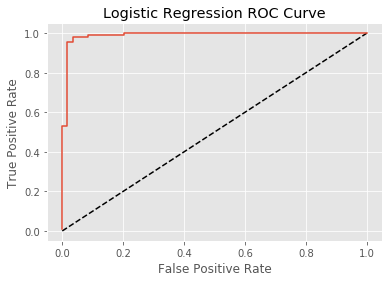

In [44]:
from sklearn.metrics import roc_curve
ye_pred_prob = logreg.predict_proba(Xe_test)[:,1]
fpr, tpr, thresholds = roc_curve(ye_test, ye_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

### Example:  PIMA Indians & diabetes (UCI Machine Learning Repository)

In [45]:
# Import the necessary modules
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(X_pima, y_pima, test_size = 0.4, 
                                                                        random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_pima_train,y_pima_train)

# Predict the labels of the test set: y_pred
y_pima_pred = logreg.predict(X_pima_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_pima_test, y_pima_pred))
print(classification_report(y_pima_test, y_pima_pred))

[[176  30]
 [ 35  67]]
             precision    recall  f1-score   support

        0.0       0.83      0.85      0.84       206
        1.0       0.69      0.66      0.67       102

avg / total       0.79      0.79      0.79       308



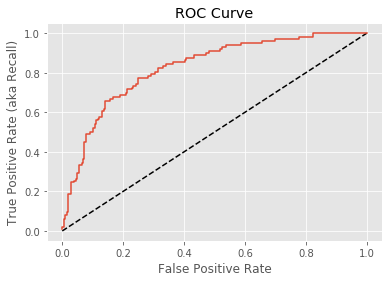

In [46]:
#from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pima_pred_prob = logreg.predict_proba(X_pima_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_pima_test, y_pima_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (aka Recall)')
plt.title('ROC Curve')
plt.show()

### Precision Recall curve for PIMA data

Average precision-recall score: 0.68


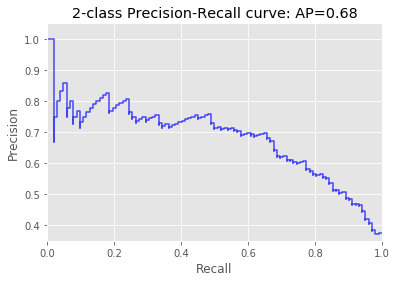

In [47]:
from sklearn.metrics import precision_recall_curve

y_pima_score = logreg.decision_function(X_pima_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_pima_test, y_pima_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(y_pima_test, y_pima_score)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
#plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.35, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

$Precision: \frac{tp}{tp+fp}$ positive predictive value (ppv) 

$Recall: \frac{tp}{tp+fn}$ sensitivity, hit rate, true positive rate 

All true:
 - A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
 - Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
 - When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.


## Area under the Receiver operating characteristic curve - AUC
If you can create a model with a perfect True Positive rate (aka 1) and a perfect False Positive Rate (aka 0) then the ROC curve will look like this:
<img src="data/AUC_perfectModel.png" alt="Alt text that describes the graphic" title="From example ref"  width="344" height="256"/>
and the area under the curve will be at a maximum - so this area under curve or 'AUC' can be a very good score of a models effectiveness.
Curves normalized so area in this case = 1, a random model will have area 0.5 and a straight diagonal line (the dotted one).

### Example:  Election data

In [50]:
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye_b, test_size=0.4, random_state=42)
logreg.fit(Xe_train, ye_train)
ye_pred_prob = logreg.predict_proba(Xe_test)[:,1]
roc_auc_score(ye_test, ye_pred_prob)

0.9893883566691231

### now also using cross validation

In [52]:
#from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, Xe, ye_b, cv=5, scoring='roc_auc')
print(cv_scores)

[0.99673203 0.99183007 0.99583796 1.         0.96140652]


### AUC curve for PIMA data

In [53]:
# Import necessary modules
#from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import cross_val_score

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_pima_train,y_pima_train)

# Compute predicted probabilities: y_pred_prob
y_pima_pred_prob = logreg.predict_proba(X_pima_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_pima_test, y_pima_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X_pima, y_pima, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8254806777079764
AUC scores computed using 5-fold cross-validation: [0.80185185 0.80648148 0.81481481 0.86245283 0.85566038]


# Hyper-parameter tuning

Parameters that have to be specified before training the model are hyper-parameters. Try a bunch, score each on unseen data and then pick the best. Important to use cross validation

Grid search will try every option, random search jumps around the range of variable you want to test.

- Linear regression: Choosing parameters/model structure 
- Ridge/lasso regression: Choosing alpha
- k-Nearest Neighbors: Choosing n_neighbors 

Hyper-parameters cannot be learned by fitting the model

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(Xe, ye)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 4}
0.9310344827586207


### Example:  PIMA Indians & diabetes data
Note: Not splitting the data into training and test sets to focus on the process of setting up the hyper-parameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes.

In [59]:
# Import necessary modules
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_pima, y_pima)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7708333333333334


Grid search can be very computationally expensive, especially if you are searching over a large hyper-parameter space and have many parameters. RandomizedSearchCV can be better in this case - as not all combinations are tested. A fixed number are sampled and then tested.

Decision Tree is used for the model. Decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as with other models. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

In [60]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_pima, y_pima)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 5}
Best score is 0.7291666666666666


# Hold out set - or Train, Validate & Test
You want to hold a set of data for testing performance after hyper-parameter optimization.
Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning 
- Perform grid search cross-validation on training set
- Choose best hyper-parameters and evaluate on hold-out set

In [61]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets (test set functioning as hold out)
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(X_pima, y_pima, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_pima_train, y_pima_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7652173913043478


## Elastic net regularized regression

In elastic net regularization, the penalty term is a linear combination of the `L1` and `L2` penalties:
$$a∗L1+b∗L2$$
In scikit-learn, this term is represented by the `l1_ratio` parameter: An `l1_ratio` of 1 corresponds to an `L1` penalty, and anything lower is a combination of `L1` and `L2`.

### Example: Gap minder

In [62]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X_gp, y_gp, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(Xg_train, yg_train)

# Predict on the test set and compute metrics
yg_pred = gm_cv.predict(Xg_test)
r2 = gm_cv.score(Xg_test, yg_test)
mse = mean_squared_error(yg_pred, yg_test)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372825116
Tuned ElasticNet MSE: 10.057914130642965


# Preprocessing data
[scikit learn docs](http://scikit-learn.org/stable/modules/preprocessing.html)
## Categorical features
Have to process categories into numerical values - dummy variables 1 for each category

| Origin | origin_Asia | origin_US | 
|----|----|----|
| US | 0 | 1 |
| Asia | 1 | 0 |
| Europe | 0 | 0 |

Don't need all three columns as that would be duplicating information and can cause model problems.
When creating automatically you may need to drop one of the columns

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


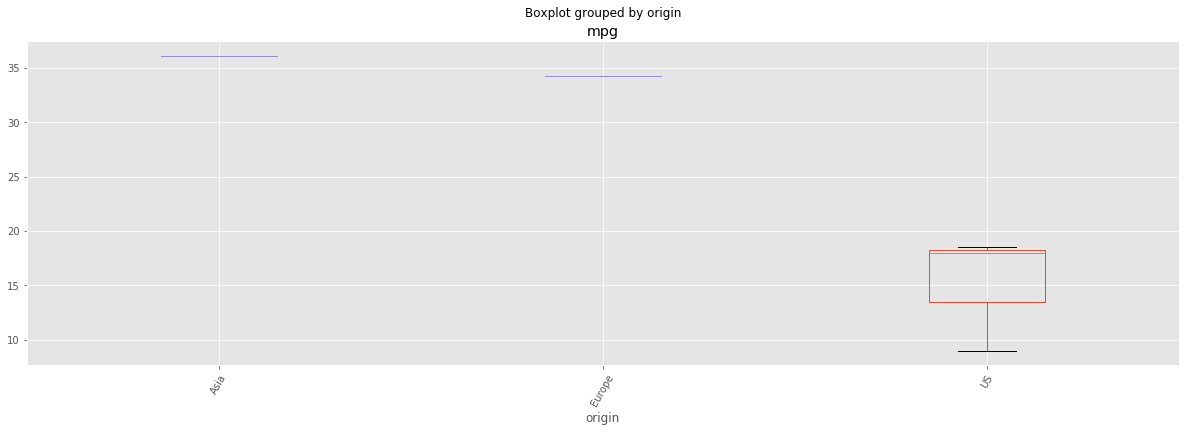

In [76]:
df_car = pd.DataFrame({'mpg':[18.0,9.0,36.1,18.5,34.3], 
                       'displ':[250.0,304.0,91.0,250.0,97.0],
                       'hp': [88,193,60,98,78],
                       'weight': [3139,4732,1800,3525,2188],
                       'accel' : [14.5,18.5,16.4,19.0,15.8],
                       'origin' : ['US', 'US', 'Asia', 'US', 'Europe'],
                       ' size' : [15.0,20.0,10.0,15.0,10.0]})
display(df_car.head())
# missing most of the data
#df_car.boxplot(column='mpg', by='origin', rot=60, figsize=[20,6])
#plt.show()

In [82]:
df_origin = pd.get_dummies(df_car)
display(df_origin.head())
df_origin = df_origin.drop('origin_Asia', axis=1)
display(df_origin.head())
# or
df_origin_2 = pd.get_dummies(df_car, drop_first=True)
display(df_origin_2.head())

X_car = df_origin_2.drop(['mpg'], axis=1).values
y_car = df_origin_2['mpg'].values
y_car = y_car.reshape(-1, 1)

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


Can also use scikit-learn: OneHotEncoder()

In [83]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Ridge
X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(X_car, y_car, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_car_train,y_car_train)
ridge.score(X_car_test, y_car_test)

0.8845976610035476

### Example: Gap minder - will region included in data

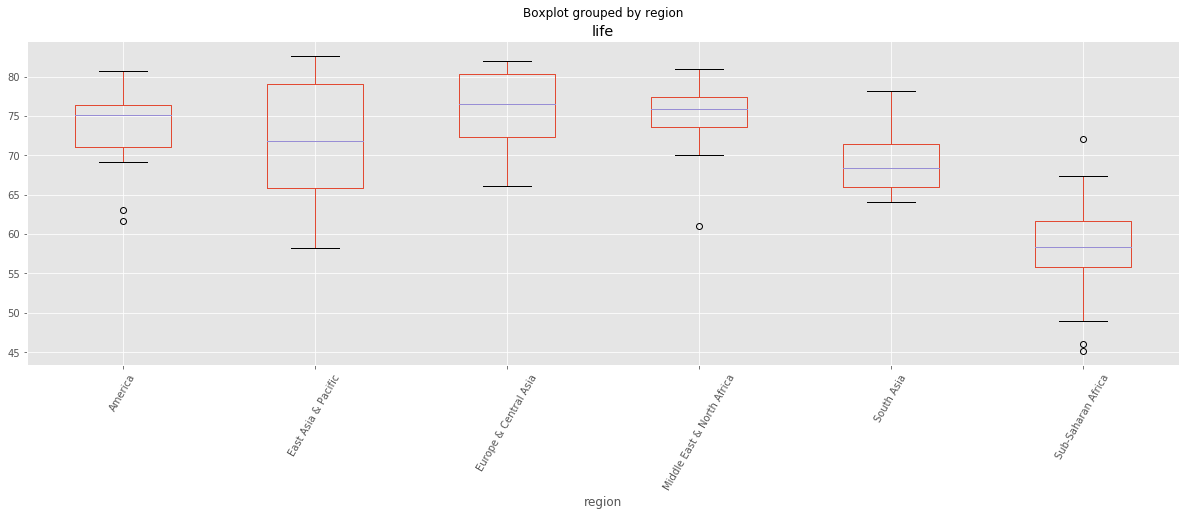

In [85]:
# Create a boxplot of life expectancy per region
df_gp.boxplot(column='life', by='region', rot=60, figsize=[20,6])
plt.show()

In [84]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df_gp)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df_gp, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'region_America',
       'region_East Asia & Pacific', 'region_Europe & Central Asia',
       'region_Middle East & North Africa', 'region_South Asia',
       'region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Middle East & North Africa',
       'region_South Asia', 'region_Sub-Saharan Africa'],
      dtype='object')


In [86]:
# Create arrays for features and target variable
y_gp = df_region['life'].values
y_gp = y_gp.reshape(-1, 1)
Xall_gp = df_region.drop(['life'], axis=1).values

In [87]:
# Import necessary modules
#from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, Xall_gp, y_gp, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86900749 0.80474826 0.84072719 0.77595581 0.87455802]


## Missing data

In [121]:
df_pima_raw = pd.read_csv('data/scl_ds3_PIMA_raw.csv')
display(df_pima_raw.head())
print(X_pima.shape, y_pima.shape)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


(768, 8) (768,)


triceps = thickness of the skin, this can't be 0 likewise the triceps and bmi can't be zero

In [122]:
df_pima_raw.insulin.replace(0, np.nan, inplace=True)
df_pima_raw.triceps.replace(0, np.nan, inplace=True)
df_pima_raw.bmi.replace(0, np.nan, inplace=True)
df_pima_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null float64
glucose        768 non-null float64
diastolic      768 non-null float64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null float64
diabetes       768 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB


In [123]:
# dropping missing data is an ok strategy IF only a few rows are affected
df = df_pima_raw.dropna()
df.shape

(393, 9)

Too much data is affected here - so we need to impute the missing data: Make an educated guess about the missing values. By example we'll use the mean of the non-missing entries for the missing entries.

In [124]:
X_pima_r = df_pima_raw.drop('diabetes', axis=1).values
y_pima_r = df_pima_raw['diabetes'].values

In [132]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X_pima_r)
temp = imp.transform(X_pima_r)
temp[:5,3:6]

array([[ 35.        , 155.54822335,  33.6       ],
       [ 29.        , 155.54822335,  26.6       ],
       [ 29.15341959, 155.54822335,  23.3       ],
       [ 23.        ,  94.        ,  28.1       ],
       [ 35.        , 168.        ,  43.1       ]])

## Imputing within a pipeline
Pipelines allow you to define steps that then get taken care of for you.
The last step in a pipeline must be an estimator.

In [130]:
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()
steps = [('imputation', imp),('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X_pima_r, y_pima_r,
                                                    test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.7619047619047619

### Example: Election

In [140]:
df_elec_r = pd.read_csv('data/scl_ds1_raw.csv',delimiter=",")
df_elec_r.shape

(435, 17)

In [141]:
# Convert '?' to NaN
df_elec_r[df_elec_r == '?'] = np.nan

# Print the number of NaNs
print(df_elec_r.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df_elec_r.shape))

# Drop missing values and print shape of new DataFrame
df = df_elec_r.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [146]:
# Create arrays for the features and the response variable
ye_raw = df_elec_r['party'].values
Xe_raw = df_elec_r.drop('party', axis=1).values
# lables need to be 1's and 0's for sklearn's logistic regression
ye_raw_b = [0 if x == 'republican' else 1 for x in ye_raw]

In [147]:
#### step by step code - more efficient code directly below
# Import the Imputer module
#from sklearn.preprocessing import Imputer
#from sklearn.svm import SVC

# Setup the Imputation transformer: imp
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
#clf = SVC()

# Setup the pipeline with the required steps: steps
#steps = [('imputation', imp),
#        ('SVM', clf)]

In [148]:
# Import necessary modules
#from sklearn.preprocessing import Imputer
#from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
         ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xe_raw, ye_raw_b,
                                                    test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96        46
          1       0.99      0.96      0.98        85

avg / total       0.97      0.97      0.97       131



# Centering and Scaling (aka normalization)
Need features to be of about the same size - so that no one feature had an undue effect eg through distance measures.

May not be needed if all your features are already of the same order (eg all are binary like in the election data).

Standardization: subtract the mean and divide by the variance
        all features centered around `0` and have variance `1`
can also subtract the minimum and divide by the range
        minimum `0` and maximum `1`
can also normalize so the data ranges from `-1` to `1`



### Example: red_wine

In [187]:
df_rw = pd.read_csv('data/wine/winequality-red.csv',delimiter=";")
df_rw.shape

(1599, 12)

In [194]:
display(df_rw.describe())
#display(df_rw.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [189]:
df_rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [190]:
# Create arrays for the features and the response variable
y_rw = df_rw['quality'].values
X_rw = df_rw.drop('quality', axis=1).values
# lables need to be 1's and 0's for sklearn's logistic regression
y_rw_b = [1 if x <= 5 else 0 for x in y_rw]
print(y_rw[:5])
print(y_rw_b[:5])

[5 5 5 6 5]
[1, 1, 1, 0, 1]


In [191]:
# Scaling in scikit-learn
from sklearn.preprocessing import scale

X_rw_scaled = scale(X_rw)
print(np.mean(X_rw), np.std(X_rw))
print(np.mean(X_rw_scaled), np.std(X_rw_scaled))

8.134219224515322 16.726533979432848
2.546626531486538e-15 1.0


In [195]:
# Scaling in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X_rw, y_rw_b,
                                                    test_size=0.2, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
#Out[12]: 0.956

knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
knn_unscaled.score(X_test, y_test)
#Out[14]: 0.928

0.746875


0.646875

In [206]:
# CV and scaling in a pipeline
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

# parameters is a dict where keys are of form 'step_name__parameter_name'
parameters = {'knn__n_neighbors' : np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X_rw, y_rw_b,
                                                    test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
          
print(cv.best_params_)
#{'knn__n_neighbors': 41}
print(cv.score(X_test, y_test))
#0.956
print(classification_report(y_test, y_pred))
#precision    recall  f1-score   support
#          0       0.97      0.90      0.93        39
#          1       0.95      0.99      0.97        75
#avg / total       0.96      0.96      0.96       114
# clearly working on a cut down dataset to boost fit scores!

{'knn__n_neighbors': 41}
0.74375
             precision    recall  f1-score   support

          0       0.76      0.79      0.77       176
          1       0.73      0.69      0.71       144

avg / total       0.74      0.74      0.74       320



### Example: white_wine

In [208]:
df_ww = pd.read_csv('data/wine/winequality-white.csv',delimiter=";")
df_ww.shape

(4898, 12)

In [209]:
# Create arrays for the features and the response variable
y_ww = df_ww['quality'].values
X_ww = df_ww.drop('quality', axis=1).values
# lables need to be 1's and 0's for sklearn's logistic regression
y_ww_b = [1 if x <= 5 else 0 for x in y_ww]
print(y_ww[:15])
print(y_ww_b[:15])

[6 6 6 6 6 6 6 6 6 6 5 5 5 7 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]


In [210]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_ww_scaled = scale(X_ww)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X_ww))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X_ww)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_ww_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_ww_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.739937614267761e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [211]:
# Import the necessary modules
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ww, y_ww_b,test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694


### Quick intro to SVM classifier
The hyperparameters available for tuning are C and gamma. C controls the regularization strength. It is analogous to the C you tuned for logistic regression in Chapter 3, while gamma controls the kernel coefficient.

In [212]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)

# Specify the hyperparameter space: of form 'step_name__parameter_name'
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ww, y_ww_b,
                                                    test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7795918367346939
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       662
          1       0.67      0.63      0.65       318

avg / total       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


### Putting it all together with the Gap Minder data
Provided data didn't have any `NaNs` even though the code written handles them!

In [214]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_gp,y_gp,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8858153598487907


### Picking the most important parameters

Standardized regression coefficients
Only if you've standardized the regression coefficients so they’re based on the same scale, you can compare the.

Change in R-squared when the variable is added to the model last

It calculates the increase in R-squared that each variable produces when it is added to a model that already contains all of the other variables.

Because the change in R-squared analysis treats each variable as the last one entered into the model, the change represents the percentage of the variance a variable explains that the other variables in the model cannot explain. In other words, this change in R-squared represents the amount of unique variance that each variable explains above and beyond the other variables in the model.

Takeaway: Look for the predictor variable that is associated with the greatest increase in R-squared.

The correlation coefficient $r$ or the coefficient of determination $r^2$. $r^2$ is the ratio between the variance in Y that is "explained" by the regression (or, equivalently, the variance in $\hat{Y}$ , and the total variance in $Y$.

## Sum of Squares
covered more in the linear_regression mini project:

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

[further reading](https://onlinecourses.science.psu.edu/stat501/node/269/)


### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.